In [23]:
import numpy as np  #numpy is used for numerical operations
import matplotlib.pyplot as plt  # Used to plot graphs (from the Matplotlib library).
from sklearn.model_selection import train_test_split #Splits the dataset into training and testing sets.
from sklearn.preprocessing import PolynomialFeatures
#PolynomialFeatures: Converts input features into polynomial form (e.g., adds x**2,x**3 etc.)
from sklearn.metrics import r2_score #r2_score: Metric to evaluate how well the model fits the data (closer to 1 is better)
from sklearn.linear_model import LinearRegression

In [24]:
#Generates 200 random values between -3 and +3 ; X.shape = (200, 1) → A 2D array of inputs.
X = 6 * np.random.rand(200, 1) - 3  # 
print(X)
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
print(y)

# y = 0.8x^2 + 0.9x + 2

[[ 0.92106208]
 [-0.03710133]
 [ 0.372784  ]
 [ 1.40770966]
 [ 0.18701337]
 [-2.12474897]
 [ 1.61267649]
 [ 2.97190641]
 [ 0.48305867]
 [-1.84144042]
 [-0.35610754]
 [-0.79506081]
 [ 2.69122694]
 [-1.99645055]
 [ 1.03919738]
 [-1.0711068 ]
 [-1.86051226]
 [ 1.98646233]
 [-2.72428774]
 [ 0.55111662]
 [ 2.12836302]
 [-0.41348069]
 [ 1.55914803]
 [ 0.20706442]
 [-2.37115635]
 [-0.09382733]
 [ 2.86807023]
 [-2.30521426]
 [ 1.03035816]
 [-0.13023042]
 [-0.82382582]
 [-1.0781411 ]
 [ 2.64610418]
 [ 2.25304979]
 [ 1.49595518]
 [ 1.5856538 ]
 [ 2.12464335]
 [ 1.19910408]
 [-1.57761573]
 [ 2.45707988]
 [ 0.12936142]
 [-1.92471384]
 [-1.64250525]
 [-2.77686227]
 [ 2.13109207]
 [-2.18947055]
 [ 1.12782879]
 [-2.99931094]
 [-0.58766254]
 [ 1.91263498]
 [ 1.23868955]
 [-2.58375815]
 [ 0.74005277]
 [-2.27856829]
 [ 0.1498406 ]
 [ 1.47261614]
 [-0.37003401]
 [ 0.40418257]
 [-2.61779552]
 [ 0.06428048]
 [ 0.46587307]
 [-0.34727457]
 [-1.38290778]
 [ 2.19105065]
 [-0.30343361]
 [-2.37509508]
 [-0.60796

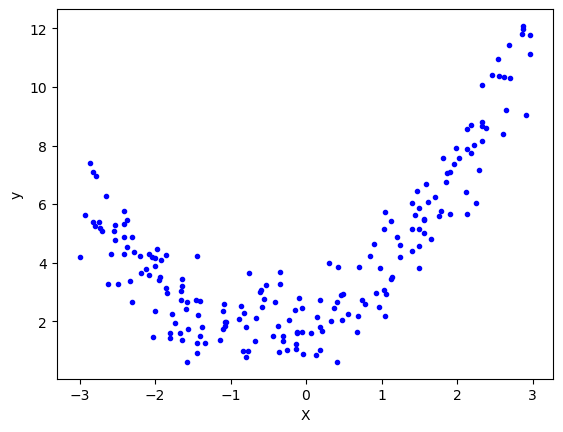

In [25]:
#Visualizing the Data
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [26]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
# Applying linear regression
lr = LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)    #Fits a simple straight-line model to training data.
r2_score(y_test,y_pred)    #evaluates using R² score.

0.20550300248844366

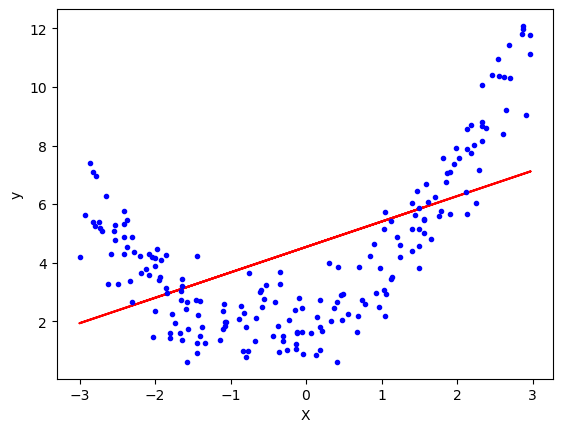

In [30]:
#Plot Linear Regression Fit
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [31]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [32]:
#Print Transformed Values
print(X_train[0])
print(X_train_trans[0])

[1.55901433]
[1.         1.55901433 2.43052569]


In [33]:
#Train Polynomial Linear Regression
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test_trans)

In [35]:
r2_score(y_test,y_pred)

0.8532396866408619

In [39]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91761176 0.80578938]]
[1.98795528]


In [37]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

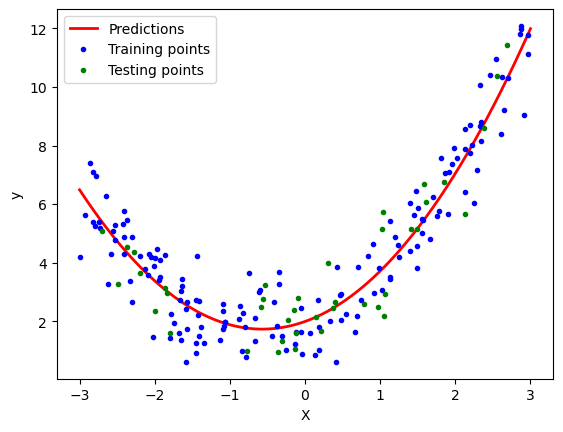

In [38]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()